In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [42]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [43]:
df.shape

(9134, 24)

In [44]:
df.columns = [df.columns[i].upper().replace(' ', '_') for i in range(len(df.columns))]
df.columns

Index(['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE',
       'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [45]:
df.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER_LIFETIME_VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE_TO_DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION_CODE                     object
MARITAL_STATUS                    object
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM            int64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS          int64
NUMBER_OF_POLICIES                 int64
POLICY_TYPE                       object
POLICY                            object
RENEW_OFFER_TYPE                  object
SALES_CHANNEL                     object
TOTAL_CLAIM_AMOUNT               float64
VEHICLE_CLASS                     object
VEHICLE_SIZE                      object
dtype: object

In [46]:
numericals = df.select_dtypes("number")
numericals

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [47]:
categorical = df.select_dtypes("object")
categorical

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [48]:
df.isna().sum()

CUSTOMER                         0
STATE                            0
CUSTOMER_LIFETIME_VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE_TO_DATE                0
EMPLOYMENTSTATUS                 0
GENDER                           0
INCOME                           0
LOCATION_CODE                    0
MARITAL_STATUS                   0
MONTHLY_PREMIUM_AUTO             0
MONTHS_SINCE_LAST_CLAIM          0
MONTHS_SINCE_POLICY_INCEPTION    0
NUMBER_OF_OPEN_COMPLAINTS        0
NUMBER_OF_POLICIES               0
POLICY_TYPE                      0
POLICY                           0
RENEW_OFFER_TYPE                 0
SALES_CHANNEL                    0
TOTAL_CLAIM_AMOUNT               0
VEHICLE_CLASS                    0
VEHICLE_SIZE                     0
dtype: int64

In [50]:
import datetime
from datetime import date

In [51]:
df['EFFECTIVE_TO_DATE']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: EFFECTIVE_TO_DATE, Length: 9134, dtype: object

In [52]:
df['EFFECTIVE_TO_DATE'] = pd.to_datetime(df['EFFECTIVE_TO_DATE'], errors='coerce')
df['EFFECTIVE_TO_DATE']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: EFFECTIVE_TO_DATE, Length: 9134, dtype: datetime64[ns]

In [53]:
df

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [54]:
df['month'] = df['EFFECTIVE_TO_DATE'].dt.month
df['month']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: month, Length: 9134, dtype: int64

In [55]:
df

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [56]:
df.dtypes

CUSTOMER                                 object
STATE                                    object
CUSTOMER_LIFETIME_VALUE                 float64
RESPONSE                                 object
COVERAGE                                 object
EDUCATION                                object
EFFECTIVE_TO_DATE                datetime64[ns]
EMPLOYMENTSTATUS                         object
GENDER                                   object
INCOME                                    int64
LOCATION_CODE                            object
MARITAL_STATUS                           object
MONTHLY_PREMIUM_AUTO                      int64
MONTHS_SINCE_LAST_CLAIM                   int64
MONTHS_SINCE_POLICY_INCEPTION             int64
NUMBER_OF_OPEN_COMPLAINTS                 int64
NUMBER_OF_POLICIES                        int64
POLICY_TYPE                              object
POLICY                                   object
RENEW_OFFER_TYPE                         object
SALES_CHANNEL                           

In [57]:
df[df['month'] <= 3]

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [58]:
def clean_numbers(i):
    if i <= 3 :
        return (i)
    else:
        return NaN

In [59]:
df['month'] = df['month'].apply(clean_numbers)
df['month']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: month, Length: 9134, dtype: int64

In [60]:
df['month'] = df['month'].apply(lambda x: x if x <= 3 else NaN)
df['month']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: month, Length: 9134, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE_TO_DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENTSTATUS               9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION_CODE                  9134 non-null   object        
 11  MARITAL_STATUS   

In [62]:
df.describe()

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


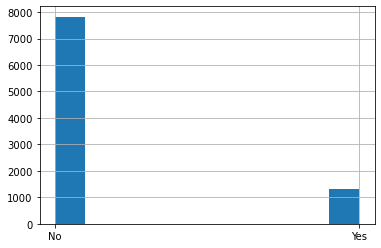

In [63]:
df['RESPONSE'].hist()
plt.show()

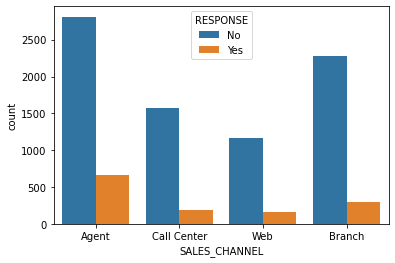

In [64]:
sns.countplot(x='SALES_CHANNEL', hue='RESPONSE', data=df)
plt.show()

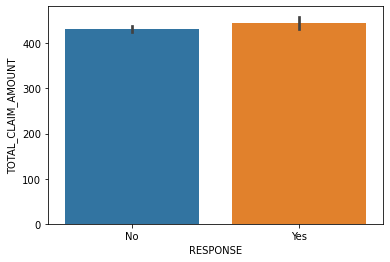

In [65]:
sns.barplot(x="RESPONSE", y="TOTAL_CLAIM_AMOUNT", data=df)
plt.show()

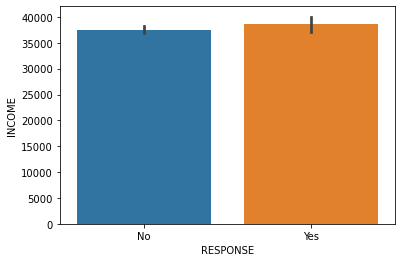

In [66]:
sns.barplot(x="RESPONSE", y="INCOME", data=df)
plt.show()

In [68]:
df.dtypes

CUSTOMER                                 object
STATE                                    object
CUSTOMER_LIFETIME_VALUE                 float64
RESPONSE                                 object
COVERAGE                                 object
EDUCATION                                object
EFFECTIVE_TO_DATE                datetime64[ns]
EMPLOYMENTSTATUS                         object
GENDER                                   object
INCOME                                    int64
LOCATION_CODE                            object
MARITAL_STATUS                           object
MONTHLY_PREMIUM_AUTO                      int64
MONTHS_SINCE_LAST_CLAIM                   int64
MONTHS_SINCE_POLICY_INCEPTION             int64
NUMBER_OF_OPEN_COMPLAINTS                 int64
NUMBER_OF_POLICIES                        int64
POLICY_TYPE                              object
POLICY                                   object
RENEW_OFFER_TYPE                         object
SALES_CHANNEL                           

In [73]:
numericals = df.select_dtypes("number")
numericals

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,2
9131,8163.890428,0,85,9,37,3,2,790.784983,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,2


In [37]:
categoricals = df.select_dtypes(include=object)
categoricals

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


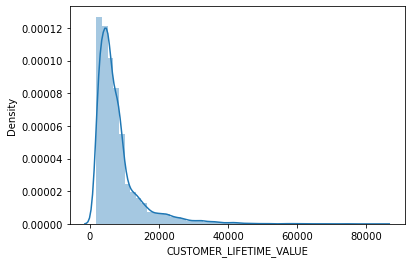

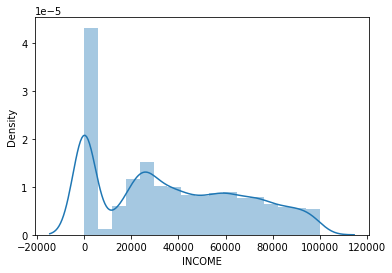

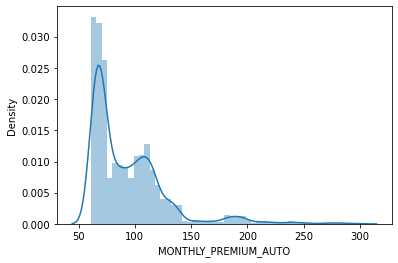

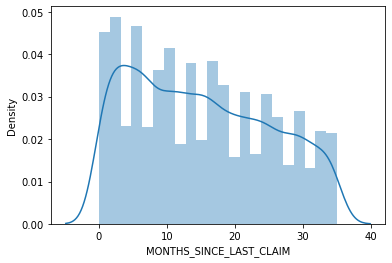

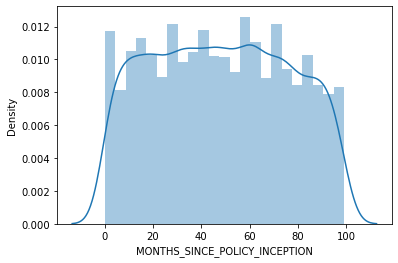

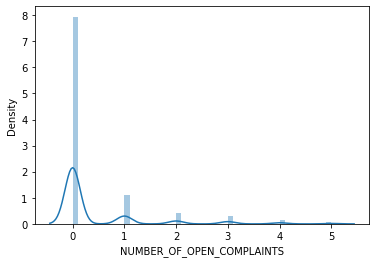

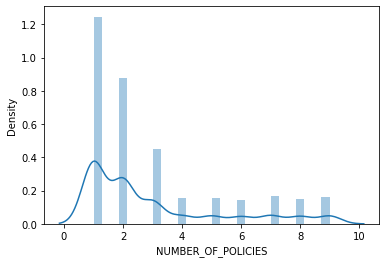

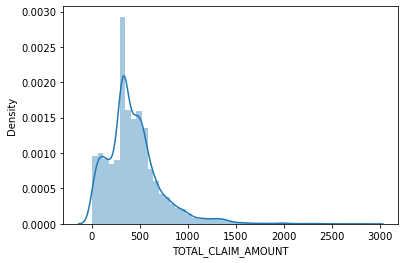

In [38]:
for col in numericals.columns:
    sns.distplot(numericals[col])
    plt.show()

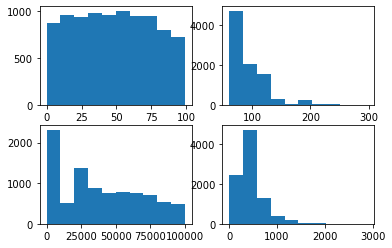

In [39]:
ig, axs = plt.subplots(2, 2)

axs[0, 0].hist(numericals['MONTHS_SINCE_POLICY_INCEPTION'])
axs[0, 1].hist(numericals['MONTHLY_PREMIUM_AUTO'])
axs[1, 0].hist(numericals['INCOME'])
axs[1, 1].hist(numericals['TOTAL_CLAIM_AMOUNT'])

plt.show()

In [36]:
df.corr()

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT,month
CUSTOMER_LIFETIME_VALUE,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
INCOME,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
MONTHLY_PREMIUM_AUTO,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
MONTHS_SINCE_LAST_CLAIM,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
MONTHS_SINCE_POLICY_INCEPTION,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
NUMBER_OF_OPEN_COMPLAINTS,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
NUMBER_OF_POLICIES,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
TOTAL_CLAIM_AMOUNT,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


In [38]:
df.corr()['TOTAL_CLAIM_AMOUNT']

CUSTOMER_LIFETIME_VALUE          0.226451
INCOME                          -0.355254
MONTHLY_PREMIUM_AUTO             0.632017
MONTHS_SINCE_LAST_CLAIM          0.007563
MONTHS_SINCE_POLICY_INCEPTION    0.003335
NUMBER_OF_OPEN_COMPLAINTS       -0.014241
NUMBER_OF_POLICIES              -0.002354
TOTAL_CLAIM_AMOUNT               1.000000
month                            0.006820
Name: TOTAL_CLAIM_AMOUNT, dtype: float64

In [46]:
corr_df = df.select_dtypes([np.number])
correlations_matrix = corr_df.corr()

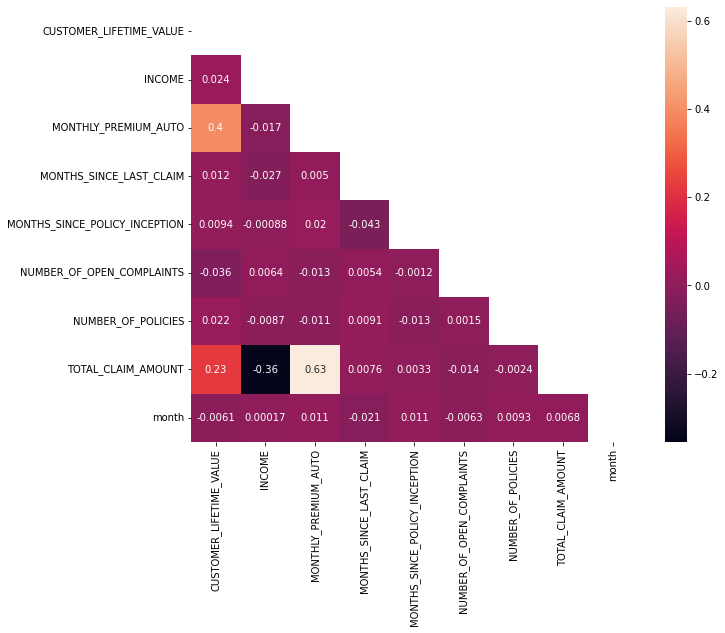

In [47]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

#### There is no high correlation among them (greater than 0.9).